# Hypothesis

1. Null Hypothesis: Both the samples namely "System A" and "System B" mean ratings are equal
2. Alternate Hypothesis: Both the samples namely "System A" and "System B" mean ratings are not equal

# T-test

1. The t-test is a way to determine whether two numbers are significantly different from one another.
2. 95 % confidence level, C = 1 - alpha
3. significance level, alpha = 0.05
4. Two-tail: (alpha/2) tails, 2 critical points, (-z, z)
3. p-value: How likely you are to have found a particular set of observations if the null hypothesis were true

In [3]:
import sqlite3
import os
import pandas as pd
import numpy as np

from scipy.stats import ttest_rel
from scipy.stats import wilcoxon

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [6]:
plt.rcParams.update({'font.size': 13})

In [7]:
def sqlite_common_query_seq(sql_query, sql_select=False, sql_insert_params=None):

    print('running sqlite_common_query_seq')

    try:
        conn = sqlite3.connect(sqlite_db_path)

        cursor = conn.cursor()

        if sql_insert_params:
            cursor.execute(sql_query, sql_insert_params)
        else:
            cursor.execute(sql_query)

        if sql_select:
            query_result = cursor.fetchall()
            conn.close()

            return query_result

        conn.commit()
        conn.close()

        print('finished sqlite_common_query_seq')
    except Exception as e:
        print(e)
        
def get_label_name_clustering(label_id):
    
    if label_id == 1:
        return 'Distinctive and well-labeled'
    elif label_id == 2:
        return 'Distinctive and not well-labeled'
    elif label_id == 3:
        return 'Not distinctive and well-labeled'
    elif label_id == 4:
        return 'Not distinctive and not well-labeled'
    
def get_label_name_survey(label_id):
    
    if label_id == 1:
        return 'System A'
    elif label_id == 2:
        return 'System B'
    elif label_id == 3:
        return 'Neither System A nor B'
    
def get_label_name_final(label_id):
    
    if label_id == 1:
        return 'Useful'
    elif label_id == 2:
        return 'Not useful'
    
def get_true_label(label, a_val, b_val):
    
    if label == 1 and a_val >= b_val:
        return 1
    elif label == 2 and b_val >= a_val:
        return 1
    elif label == 3:
        return 1
    else:
        return 0

In [8]:
sqlite_db_path = os.getcwd() + '/../../DB/survey_results_dataset.db'

In [9]:
select_table_query = """SELECT * FROM clustering_output_survey_data;"""

query_result = sqlite_common_query_seq(select_table_query, sql_select=True) 
query_result

clustering_output_df = pd.DataFrame(query_result, columns=['session_id', 'query', 'survey_label_1', 'timestamp'])
clustering_output_df.sample(2)

running sqlite_common_query_seq


,session_id,query,survey_label_1,timestamp
18,ac3367b624c344eca87ef19d0fdd5e16,Software Defined Networking,4,2023-04-06 14:35:41.938044
15,39257501e4fc4cbca9f6f7786017d24c,Kryptographie,2,2023-03-31 08:07:02.301857


In [49]:
select_table_query = """SELECT * FROM system_comparision_survey_data;"""

query_result = sqlite_common_query_seq(select_table_query, sql_select=True)
query_result

comparision_output_df = pd.DataFrame(query_result, columns=['session_id', 'query', 'sub_topic', 'survey_label_2', 'survey_label_3', 'survey_label_4', 'timestamp'])
comparision_output_df.sample(2)

running sqlite_common_query_seq


,session_id,query,sub_topic,survey_label_2,survey_label_3,survey_label_4,timestamp
6,f1c61cc976ac4a2d8a3bf658060cc5fc,Edge computing,Everbetter processor,1,2.6,0.9,2023-03-22 05:58:06.702319
0,e6e92cf3ce6246b58f936a2a4e6ac7a6,Künstliche Intelligenz,KI,1,9.0,7.0,2023-03-21 13:20:01.835452


In [11]:
select_table_query = """SELECT * FROM xxx_survey_output;"""

query_result = sqlite_common_query_seq(select_table_query, sql_select=True)
query_result

survey_output_df = pd.DataFrame(query_result, columns=['session_id', 'query', 'survey_label_5', 'timestamp'])
survey_output_df.sample(2)

running sqlite_common_query_seq


,session_id,query,survey_label_5,timestamp
1,f1c61cc976ac4a2d8a3bf658060cc5fc,Main Ground Combat System (MGCS),2,2023-03-22 05:53:50.068984
7,5f64b4b5ae9a42728a0e80a30f64959d,Robotik,2,2023-03-27 12:03:15.386247


In [12]:
clustering_output_df[clustering_output_df['query'] == 'Wellenformen und -ausbreitung']

,session_id,query,survey_label_1,timestamp
6,8fd7002669364644962d58497ebd1253,Wellenformen und -ausbreitung,1,2023-03-22 11:18:50.241864


In [13]:
comparision_output_df[comparision_output_df['query'] == 'Wellenformen und -ausbreitung']

,session_id,query,sub_topic,survey_label_2,survey_label_3,survey_label_4,timestamp
12,8fd7002669364644962d58497ebd1253,Wellenformen und -ausbreitung,Gesundheitswesen,1,0.0,0.0,2023-03-22 11:19:20.658841


In [14]:
survey_output_df[survey_output_df['query'] == 'Wellenformen und -ausbreitung']

,session_id,query,survey_label_5,timestamp
6,8fd7002669364644962d58497ebd1253,Wellenformen und -ausbreitung,1,2023-03-22 11:19:24.856778


In [15]:
clustering_output_df = clustering_output_df[clustering_output_df['query'] != 'Wellenformen und -ausbreitung']
comparision_output_df = comparision_output_df[comparision_output_df['query'] != 'Wellenformen und -ausbreitung']
survey_output_df = survey_output_df[survey_output_df['query'] != 'Wellenformen und -ausbreitung']

In [16]:
clustering_output_df['session_id'].nunique()

12

In [17]:
comparision_output_df['session_id'].nunique()

9

In [18]:
survey_output_df['session_id'].nunique()

8

In [19]:
len(comparision_output_df.index)

23

In [50]:
comparision_output_df['true_label'] = comparision_output_df.apply(lambda x:get_true_label(x['survey_label_2'], x['survey_label_3'], x['survey_label_4']), axis=1)

In [51]:
comparision_output_df[comparision_output_df['true_label'] == 0]

,session_id,query,sub_topic,survey_label_2,survey_label_3,survey_label_4,timestamp,true_label
8,677f446b0c864984a043917dbfc0a20a,Mobile Kommunikation,Auto,2,10.0,6.1,2023-03-22 07:11:12.079465,0


In [21]:
comparision_output_df = comparision_output_df[comparision_output_df['true_label'] != 0]

In [22]:
clustering_output_df['label_name'] = clustering_output_df.apply(lambda x:get_label_name_clustering(x['survey_label_1']), axis=1)
comparision_output_df['label_name'] = comparision_output_df.apply(lambda x:get_label_name_survey(x['survey_label_2']), axis=1)
survey_output_df['label_name'] = survey_output_df.apply(lambda x:get_label_name_final(x['survey_label_5']), axis=1)

In [23]:
comparision_output_df['survey_label_diff'] = comparision_output_df.apply(lambda x:x['survey_label_3'] - x['survey_label_4'], axis=1)

In [24]:
clustering_output_df.label_name.value_counts()

Distinctive and not well-labeled        8
Distinctive and well-labeled            6
Not distinctive and not well-labeled    3
Not distinctive and well-labeled        1
Name: label_name, dtype: int64

In [25]:
comparision_output_df.label_name.value_counts()

System A                  18
Neither System A nor B     4
Name: label_name, dtype: int64

In [26]:
survey_output_df.label_name.value_counts()

Useful        6
Not useful    5
Name: label_name, dtype: int64

In [27]:
survey_output_df[survey_output_df['survey_label_5']==1]['query']

0      Künstliche Intelligenz
4        Mobile Kommunikation
8          Quantentechnologie
9               Kryptographie
10     Künstliche Intelligenz
11    china Image recognition
Name: query, dtype: object

In [28]:
survey_output_df[survey_output_df['survey_label_5']==2]['query']

1    Main Ground Combat System (MGCS)
2                      Edge computing
3                    Geoinformationen
5            Semantische Technologien
7                             Robotik
Name: query, dtype: object

In [29]:
clustering_output_df[clustering_output_df['survey_label_1']==4]['query']

0          Künstliche Intelligenz
5          Künstliche Intelligenz
18    Software Defined Networking
Name: query, dtype: object

In [30]:
comparision_output_df[comparision_output_df['survey_label_3']<3.27][['query', 'sub_topic']]

,query,sub_topic
4,Main Ground Combat System (MGCS),Projekt
5,Edge computing,SOSA
6,Edge computing,Everbetter processor
7,Geoinformationen,Operationsführung
9,Semantische Technologien,March
18,Main Ground Combat System (MGCS),Laser beam


In [31]:
comparision_output_df[comparision_output_df['survey_label_3']>8][['query', 'sub_topic']]

,query,sub_topic
0,Künstliche Intelligenz,KI
2,Künstliche Intelligenz,Military
19,Kryptographie,Polizei Geheimdienst
21,china Image recognition,Privacy


In [32]:
comparision_output_df.survey_label_3.describe()

count    22.000000
mean      5.459091
std       2.921783
min       0.500000
25%       3.275000
50%       5.200000
75%       8.000000
max      10.000000
Name: survey_label_3, dtype: float64

In [33]:
comparision_output_df.describe()

,survey_label_2,survey_label_3,survey_label_4,true_label,survey_label_diff
count,22.000000,22.000000,22.000000,22.0,22.000000
mean,1.363636,5.459091,3.281818,1.0,2.177273
std,0.789542,2.921783,2.775168,0.0,1.829892
min,1.000000,0.500000,0.200000,1.0,0.000000
25%,1.000000,3.275000,0.825000,1.0,1.000000
50%,1.000000,5.200000,2.750000,1.0,1.700000
75%,1.000000,8.000000,4.975000,1.0,3.750000
max,3.000000,10.000000,9.000000,1.0,7.000000


In [57]:
def plot_seaborn_subplots(df, figure_title, col_name_1, col_name_2, x_label, y_label, filename, color1, color2):
    
    sns.set_palette("pastel")
    sns.set_style("darkgrid", {'axes.grid' : True})

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle(figure_title)
    axes[0].set_title('System A')
    axes[1].set_title('System B')
    
    axes[0].set(xlabel='System A ratings')
    axes[1].set(xlabel='System B ratings')

    sns.histplot(ax=axes[0], data=df, x=col_name_1, kde=True, color=color1, bins=13)
    sns.histplot(ax=axes[1], data=df, x=col_name_2, kde=True, color=color2, bins=13)
    

    plt.savefig(filename+'.png', bbox_inches='tight')
    plt.show()
    
def plot_seaborn_barplots(filename):
    
    sns.set_palette("pastel")
    sns.set_style("darkgrid", {'axes.grid' : True})

    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle('Individual response analysis regarding the clustering output')
#     axes[0].set_title('Distinctiveness')
#     axes[1].set_title('Well-labeled')
    
    distinctiveness = [{'label':'Distinctive', 'Count': 14}, {'label':'Non distinctive', 'Count': 4}]
    well_labeled = [{'label': 'Well-labeled','Count': 7}, {'label':'Not well-labeled', 'Count': 11}]
    
    df1 = pd.DataFrame(distinctiveness)
    df2 = pd.DataFrame(well_labeled)

    sns.barplot(ax=axes[0], data=df1, x="label", y="Count")
    sns.barplot(ax=axes[1], data=df2, x="label", y="Count")
    
    axes[0].set_xlabel(xlabel='')
    axes[1].set_xlabel(xlabel='')

    plt.savefig(filename+'.png', bbox_inches='tight')
    plt.show()
    
def plot_seaborn_pieplots(filename):
    
    data = [8, 6, 3, 1]
    labels = ['Distinctive and not well-labeled', 'Distinctive and well-labeled', 'Not distinctive and not well-labeled', 'Not distinctive and well-labeled']

    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]

    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
    plt.savefig(filename+'.png', bbox_inches='tight')
    plt.show()
    
    
def plot_seaborn_barplots_systems(filename):
    
    sns.set_palette("pastel")
    sns.set_style("darkgrid", {'axes.grid' : True})
    
#     fig, axes = plt.subplots(1, 1, figsize=(10,5))
#     fig.suptitle('IR system comparison feedback')

    data = [{'label': 'System A','Count': 18}, {'label': 'System B','Count': 0}, {'label': 'Neither system A nor system B','Count': 4}]
    
    df1 = pd.DataFrame(data)
    
    sns.barplot(data=df1, x="label", y="Count")
    
    plt.savefig(filename+'.png', bbox_inches='tight')
    plt.show()

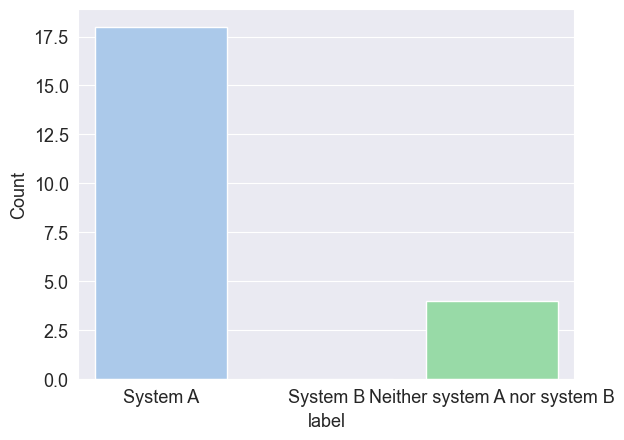

In [58]:
plot_seaborn_barplots_systems('barplot_system_comparison')

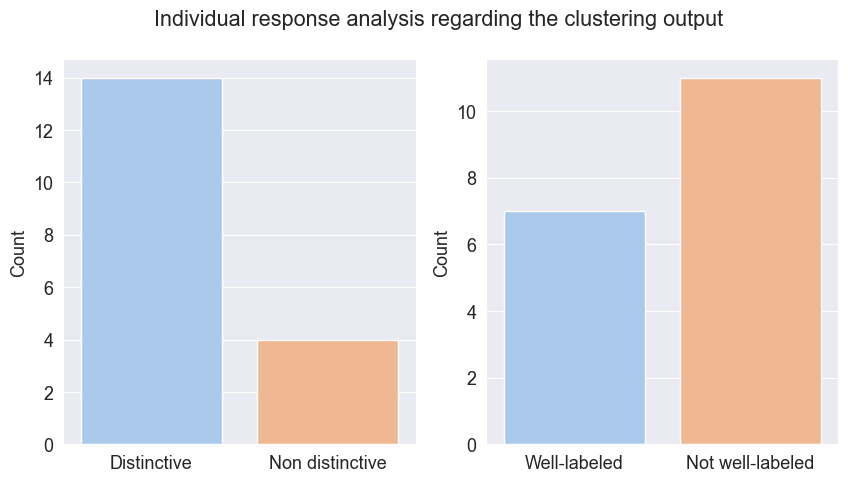

In [36]:
plot_seaborn_barplots('barplots')

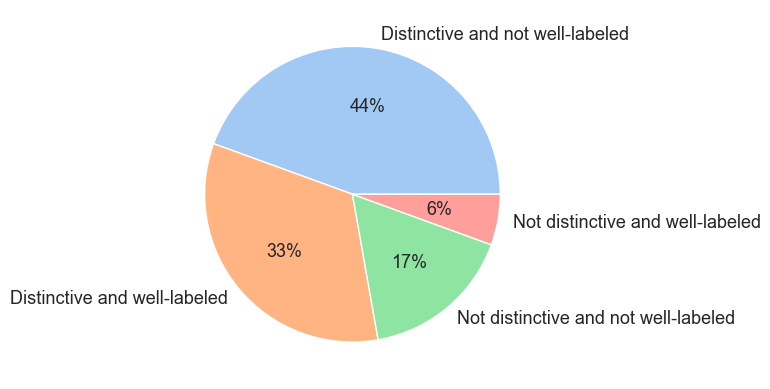

In [37]:
plot_seaborn_pieplots('rating_piecharts')

In [38]:
clustering_output_df.label_name.value_counts()

Distinctive and not well-labeled        8
Distinctive and well-labeled            6
Not distinctive and not well-labeled    3
Not distinctive and well-labeled        1
Name: label_name, dtype: int64

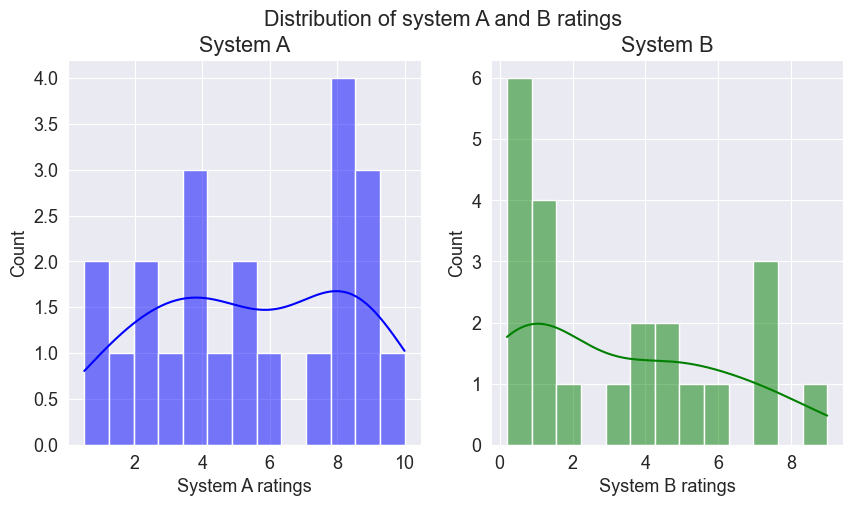

In [39]:
figure_title = 'Distribution of system A and B ratings'
plot_seaborn_subplots(comparision_output_df, figure_title, "survey_label_3", "survey_label_4", 'Mean clusters count', "Mean targeted negative document ratio", 'rating_histograms', 'blue', 'green')

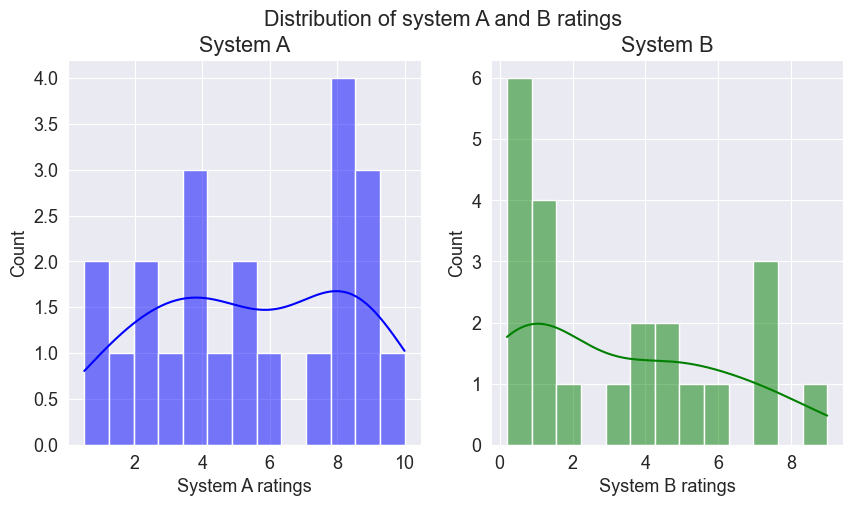

In [40]:
figure_title = 'Distribution of system A and B ratings'
plot_seaborn_subplots(comparision_output_df, figure_title, "survey_label_3", "survey_label_4", 'Mean clusters count', "Mean targeted negative document ratio", 'rating_histograms', 'blue', 'green')

<AxesSubplot:>

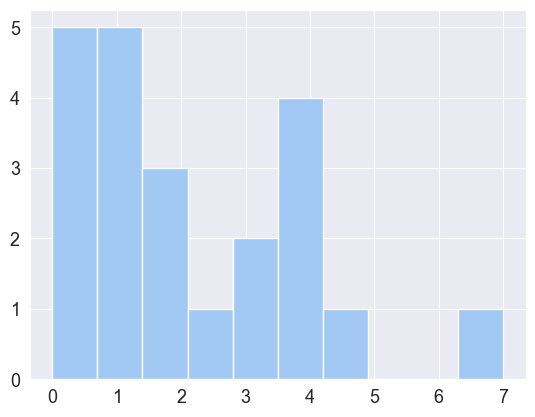

In [41]:
comparision_output_df.survey_label_diff.hist(bins=10)

In [42]:
comparision_output_df.survey_label_3.var()

8.536818181818184

In [43]:
comparision_output_df.survey_label_4.var()

7.701558441558441

In [44]:
sample_1 = comparision_output_df.survey_label_3.values
sample_2 = comparision_output_df.survey_label_4.values

alpha = 0.05

In [45]:
def get_test_results(sample_1, sample_2, test_type):
    
    if test_type == 't-test':
        stat, p_value = ttest_rel(sample_1, sample_2)
    elif test_type == 'wilcoxon':
        stat, p_value = wilcoxon(sample_1, sample_2, alternative='two-sided', mode = 'approx')
        print(wilcoxon(sample_1- sample_2, alternative='two-sided', mode = 'approx'))
        
    print(f'statistic value: {stat}')
    print(f'p-value: {p_value}\n')
    
    if p_value <= alpha:
        print('Reject the null hypothesis')
    elif p_value > alpha:
        print('Fail to reject the null hypothesis')

In [46]:
get_test_results(sample_1, sample_2, test_type='t-test')

statistic value: 5.580827517028029
p-value: 1.5420927260436062e-05

Reject the null hypothesis


In [47]:
get_test_results(sample_1, sample_2, test_type='wilcoxon')

WilcoxonResult(statistic=0.0, pvalue=8.69545403378786e-05)
statistic value: 0.0
p-value: 8.69545403378786e-05

Reject the null hypothesis


In [48]:
pgWilc(sample_1, sample_2)

NameError: name 'pgWilc' is not defined

In [ ]:
from researchpy import ttest

In [ ]:
rpRes = ttest(comparision_output_df['survey_label_3'], comparision_output_df['survey_label_4'], equal_variances=False, paired=True)
rpRes

In [ ]:
from researchpy import ttest
from pingouin import wilcoxon as pgWilc